In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Overfitting and Regularization

"With four parameters I can fit an elephant, and with five I can make him wiggle his trunk" (John von Newmann)

**Table of Contents**

- [Overfitting](#1.-Overfitting)
- [Detecting Overfitting: Learning Curves]()
- [Regularization]()

## 1. Overfitting

A common danger in machine learning is **overfitting**--producing a model that performs well on the data you train it on but generalizes poorly to any new data. Models that are too complex lead to overfitting and don't generalize well beyond the data they were trained on.

Let's look at an example. First, let's generate some nonlinear data, based on

$$
y(x) = e^{3x}\dfrac{\sin(3\pi^2(x-0.5))}{3\pi^2(x-0.5)}
$$

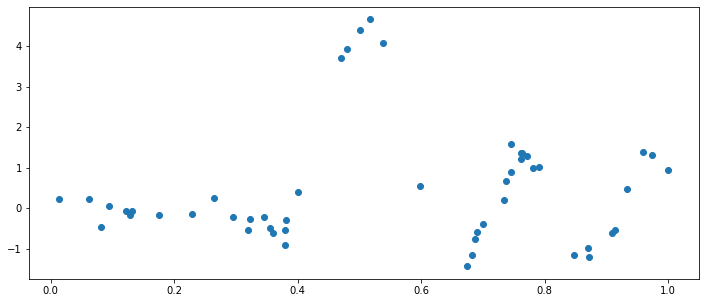

In [54]:
m = 50
x = np.random.rand(m)

num = np.sin(3*np.pi**2*(x-0.5))
den = 3*np.pi**2*(x-0.5)
y = np.exp(3*x)*num/den + 0.2*np.random.randn(m)

plt.figure(figsize=(12,5))
plt.plot(x,y,'o')

(-5.0, 6.0)

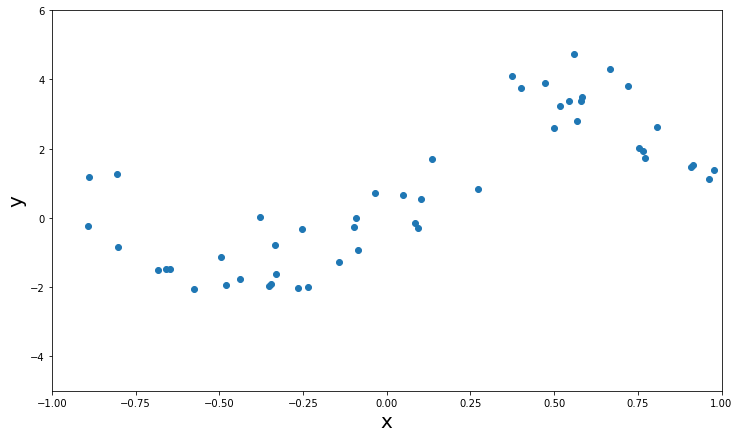

In [59]:
m=50
x = -1 + 2*np.random.rand(m)
y = -10*x**3+2*x**2+8*x + 0.75*np.random.randn(m)

plt.figure(figsize=(12,7))
plt.plot(x,y,'o')
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)


Let us split the dataset, so that one half of it is used to train the model, after which we measure the model's performance on the remaining half.

In [60]:
x_train, y_train = x[0:25], y[0:25] #first half
x_test, y_test = x[25:m], y[25:m] #last half

Let's fit degree-d polynomials to the data

$$
y = \theta_0 + \theta_1x+\theta_2x^2 + \cdots + \theta_d x^d
$$

Training Set Mean Squared Error: 0.2180727827549501
Test Set Mean Squared Error: 173.45619462739003


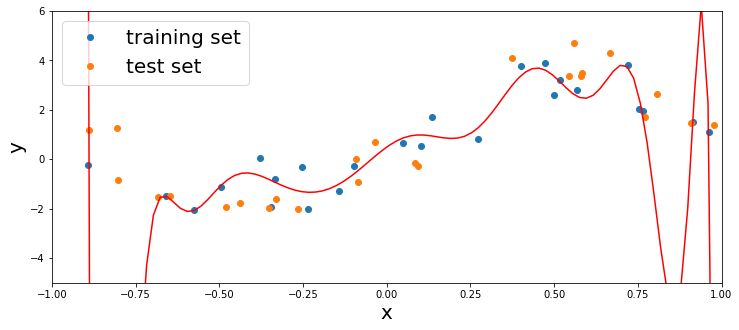

In [72]:
degree = 15
m_train = len(x_train)
m_test = len(x_test)

'build feature matrices'
X_train = np.ones((m_train,1))
X_test = np.ones((m_test,1))
for i in range(degree):
    X_train = np.c_[X_train,x_train**(i+1)]
    X_test = np.c_[X_test,x_test**(i+1)]
    
'best linear model'
theta = np.linalg.lstsq(X_train,y_train,rcond=None)[0]

'plot datapoints'
plt.figure(figsize=(12,5))
plt.plot(x_train,y_train,'o',label='training set')
plt.plot(x_test,y_test,'o',label='test set')
plt.legend(fontsize=20)
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.xlim([-1,1])
plt.ylim([-5,6])

'plot linear model'
m_plot = 100
x_plot = np.linspace(-1,1,m_plot)        
X_plot = np.ones((m_plot,1))
for i in range(degree):
    X_plot = np.c_[X_plot,x_plot**(i+1)]
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,'r',label='linear model')

'Mean Squared Error'
MSE_train = np.sum((y_train-X_train.dot(theta))**2)/len(x_train)
MSE_test = np.sum((y_test-X_test.dot(theta))**2)/len(x_test)
print('Training Set Mean Squared Error: '+str(MSE_train))
print('Test Set Mean Squared Error: '+str(MSE_test))

In [78]:
max_degree = 20
degree_list = [d for d in range(max_degree+1)] #[0,1,2,3,...,max_degree]

MSE_test = np.zeros(max_degree+1)
MSE_train = np.zeros(max_degree+1)
for degree in degree_list: #fit a polynomial of degree d
    'build feature matrices'
    X_train = np.ones((m_train,1))
    X_test = np.ones((m_test,1))
    for i in range(degree):
        X_train = np.c_[X_train,x_train**(i+1)]
        X_test = np.c_[X_test,x_test**(i+1)]
        
    'best linear model'
    theta = np.linalg.lstsq(X_train,y_train,rcond=None)[0]
    
    'Mean squared errors'
    MSE_train[degree]=np.sum((y_train-X_train.dot(theta))**2)/len(x_train)
    MSE_test[degree]=np.sum((y_test-X_test.dot(theta))**2)/len(x_test)

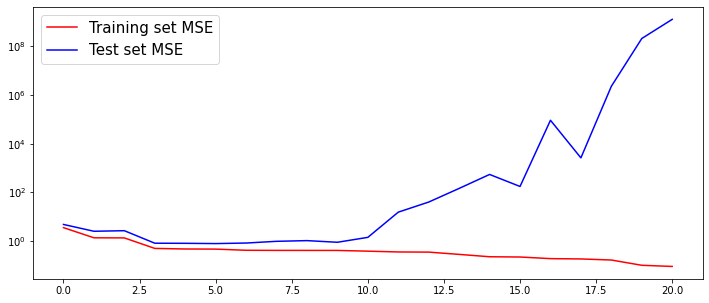

In [79]:
plt.figure(figsize=(12,5))
plt.semilogy(degree_list,MSE_train,'r-',label='Training set MSE') #semilogarithmic plot
plt.semilogy(degree_list,MSE_test,'b-',label='Test set MSE')
plt.legend(fontsize = 15)